In [1]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()

In [2]:
feature_names = data.feature_names

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

df['target'] = y

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


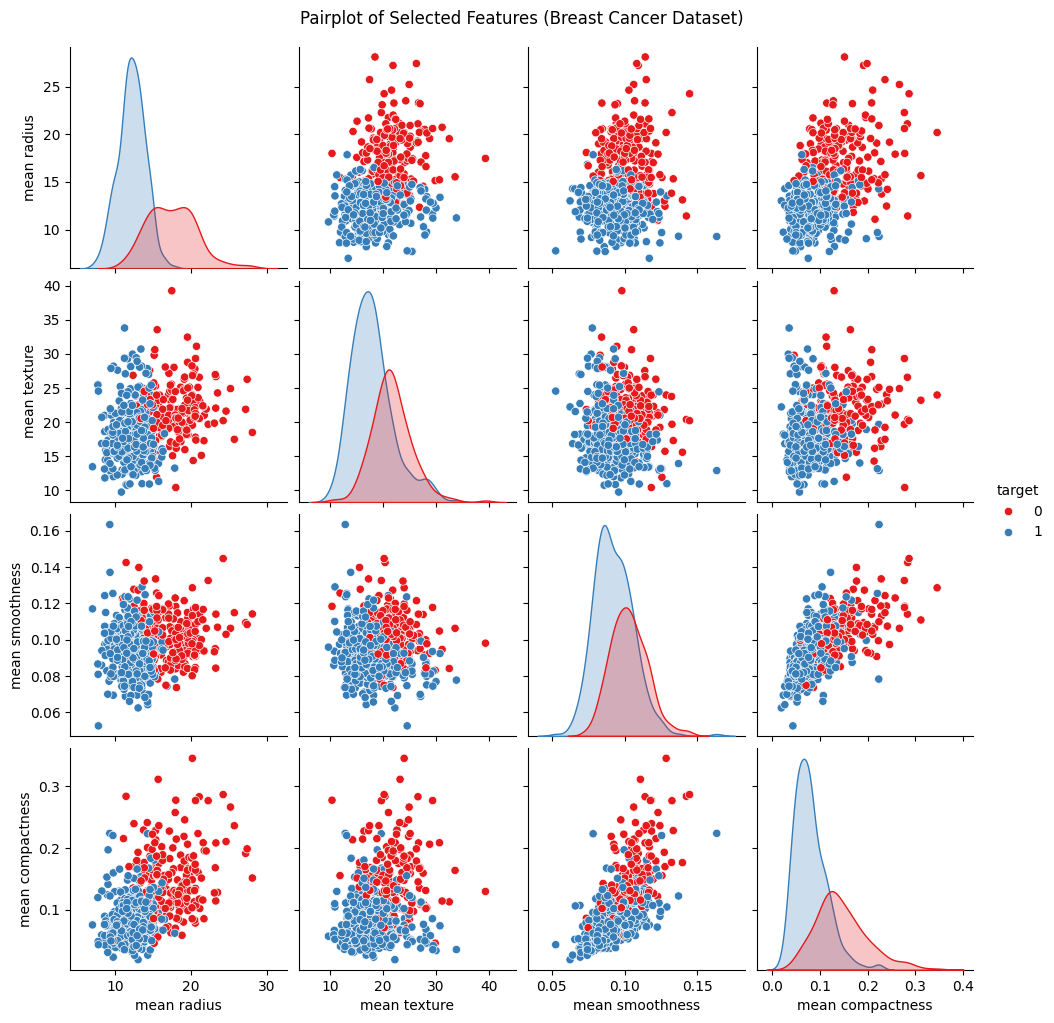

In [7]:
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'target']
sns.pairplot(df[selected_features], hue='target', palette='Set1', diag_kind='kde')

plt.suptitle("Pairplot of Selected Features (Breast Cancer Dataset)", y=1.02)
plt.show()

In [8]:
from sklearn.feature_selection import SelectKBest,f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

selected_features = feature_names[selector.get_support()]
print(selected_features)

['mean radius' 'mean perimeter' 'mean area' 'mean compactness'
 'mean concavity' 'mean concave points' 'radius error' 'perimeter error'
 'area error' 'worst radius' 'worst perimeter' 'worst area'
 'worst compactness' 'worst concavity' 'worst concave points']


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

selected_features = [
    'mean radius',
    'mean perimeter',
    'mean area',
    'mean compactness',
    'mean concavity',
    'mean concave points',
    'radius error',
    'perimeter error',
    'area error',
    'worst radius',
]


X_selected = X[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)



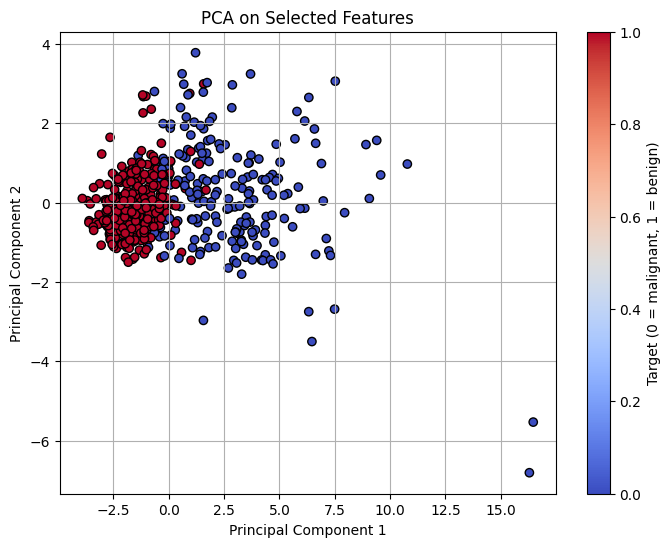

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Selected Features')
plt.colorbar(label='Target (0 = malignant, 1 = benign)')
plt.grid(True)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9385964912280702

Confusion Matrix:
 [[43  4]
 [ 3 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.94      0.96      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [17]:
from sklearn.svm import SVC

model2 = SVC(kernel='rbf')

model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9298245614035088

Confusion Matrix:
 [[42  5]
 [ 3 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.93      0.96      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this value
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9298245614035088

Confusion Matrix:
 [[44  3]
 [ 5 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        47
           1       0.95      0.93      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

